<a href="https://colab.research.google.com/github/MohammedAbdurRehman/CS-351L---AI-Lab-GitHub-Repository_2022299/blob/main/Mohammad_Abdur_Rehman_CS351L_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CS-351L Aritificial Intelligence Lab-06**

##**Lab Title: Exploring Unsupervised Learning: k-Means and Hierarchical Clustering**

Course Information:

Course Code: CS 351L

Course Title: Artificial Intelligence Lab

Instructor: Mr. Usama Arshad, PhD CS

Program: BS Cybersecurity

Semester: 5th

Reference for Lab Resources:
[CS 351L - AI Lab GitHub Repository]
(https://github.com/usamajanjua9/CS-351L---AI-Lab-)


Here are some additional explanations you can include in your Colab file to make it more comprehensive and educational for others (or yourself) when revisiting the project:

---

### **Introduction**
Add a brief explanation of the purpose of clustering and why you are comparing k-Means and Hierarchical Clustering. For example:

> **Clustering** is an unsupervised machine learning technique used to group data points into clusters based on their similarity. This notebook demonstrates the application of two popular clustering techniques—**k-Means** and **Hierarchical Clustering**—on the Iris dataset. By comparing these methods, we aim to understand their behavior, visualization, and differences in the clusters they form.

---

### **Why Normalize the Data?**
Explain the importance of normalization:

> Most clustering algorithms, including k-Means and Hierarchical Clustering, are sensitive to the scale of features. For example, features with large values can dominate distance calculations, leading to biased clustering. **StandardScaler** is used here to ensure all features contribute equally to the clustering process.

---

### **How k-Means Works**
Add a brief explanation of how k-Means clustering works:

> **k-Means** is a partitioning clustering algorithm that divides the dataset into \(k\) clusters by minimizing the sum of squared distances between data points and their respective cluster centroids. The algorithm follows these steps:
> 1. Randomly initialize \(k\) cluster centroids.
> 2. Assign each data point to the nearest centroid.
> 3. Update centroids as the mean of all points assigned to a cluster.
> 4. Repeat until convergence (centroids no longer change significantly).

---

### **How Hierarchical Clustering Works**
Explain how Hierarchical Clustering works:

> **Hierarchical Clustering** builds a tree-like structure (dendrogram) of clusters by iteratively merging or splitting them:
> - **Agglomerative Approach**: Starts with each data point as its own cluster and merges them step-by-step.
> - **Divisive Approach**: Starts with a single cluster and splits it iteratively.  
> In this example, we use the **Agglomerative Approach** with the "Ward" linkage, which minimizes the variance within clusters during merging.

---

### **Dendrogram Interpretation**
Help users understand how to read a dendrogram:

> The **dendrogram** shows the hierarchical merging of clusters:
> - Each merge represents two clusters combined based on their distance.
> - The y-axis shows the distance or dissimilarity between clusters.
> - Cutting the dendrogram at a certain height determines the number of clusters.

---

### **Comparison of Methods**
Add a dedicated section to compare the methods conceptually:

| Aspect                  | k-Means                     | Hierarchical Clustering         |
|-------------------------|-----------------------------|----------------------------------|
| **Cluster Shape**       | Assumes spherical clusters  | Can form non-spherical clusters |
| **Number of Clusters**  | Predefined by user          | Determined using the dendrogram |
| **Scalability**         | Fast for large datasets     | Computationally expensive       |
| **Flexibility**         | Fixed number of clusters    | Flexible with hierarchical view |

---

### **Discussion on Results**
After displaying results, include a discussion:

> The clusters formed by k-Means are often influenced by the initialization of centroids, and the algorithm may converge to local minima. On the other hand, Hierarchical Clustering does not require initialization but may suffer from its inability to handle large datasets efficiently.  
> In this example:
> - The dendrogram suggests that a cut around a height of \(d=3.5\) produces three clusters, consistent with k-Means.
> - Visualizations indicate similar groupings, but differences may arise based on how the algorithms compute distances and cluster shapes.

---

### **Next Steps**
Suggest future improvements or additional analyses:
1. Apply the algorithms to other datasets with non-spherical clusters to observe differences.
2. Experiment with different linkage criteria for Hierarchical Clustering (e.g., single, complete, average).
3. Evaluate clustering performance using metrics like Silhouette Score or Davies-Bouldin Index.
4. Test with higher-dimensional datasets and visualize using PCA or t-SNE for 2D projections.

---
### **Code**:


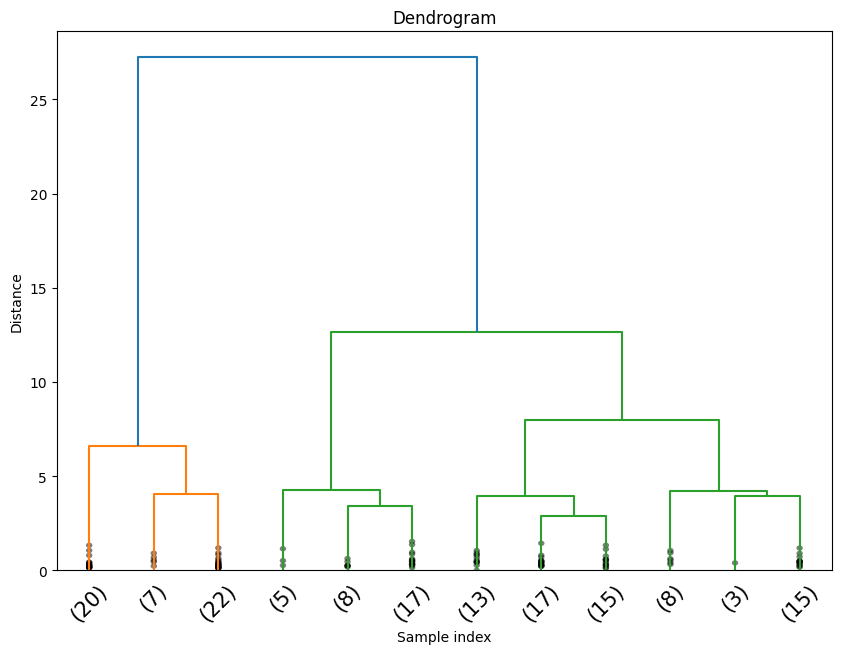

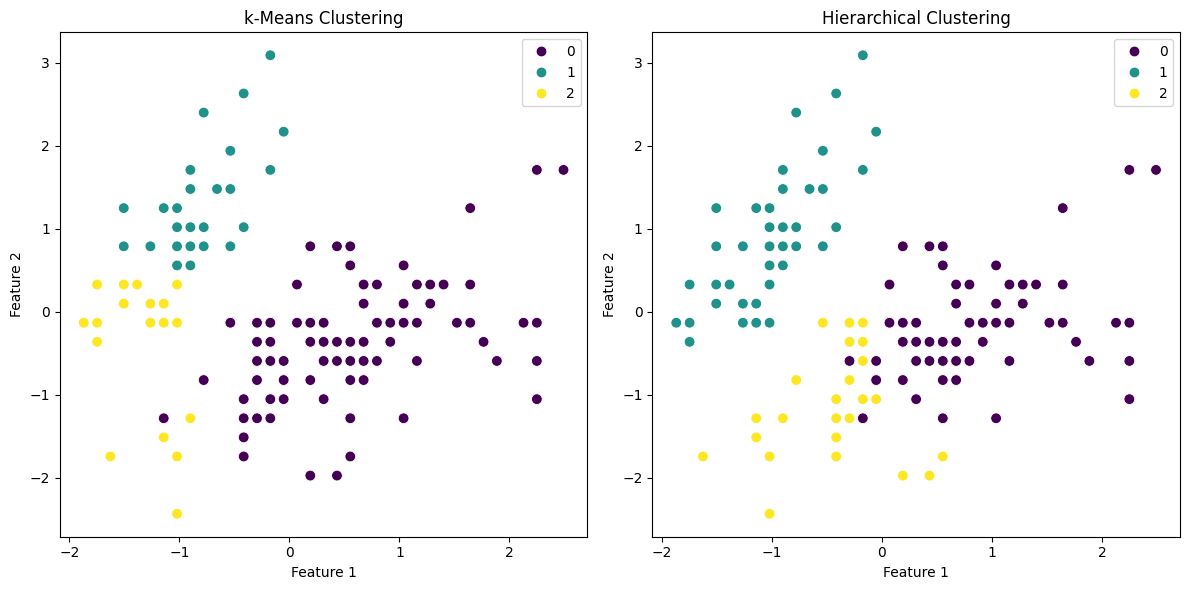

Comparison of Clusters (k-Means vs Hierarchical):
Hierarchical   0   1   2
k-Means                 
0             71   0  25
1              0  33   0
2              0  16   5

Ground Truth vs k-Means Clusters:
k-Means        0   1   2
Ground Truth            
0              0  33  17
1             46   0   4
2             50   0   0


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Setup
# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Create a DataFrame for convenience
df = pd.DataFrame(data, columns=feature_names)

# 2. Data Preprocessing
# Normalize the data using Standard Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 3. Implement k-Means Clustering
# Initialize and fit k-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Add k-Means cluster labels to DataFrame
df['kmeans_cluster'] = kmeans_labels

# 4. Implement Hierarchical Clustering (Agglomerative)
# Compute linkage matrix for dendrogram
linkage_matrix = linkage(data_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Fit Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

# Add hierarchical cluster labels to DataFrame
df['hierarchical_cluster'] = hierarchical_labels

# 5. Visualizations
# Plot the clusters formed by k-Means and Hierarchical Clustering
plt.figure(figsize=(12, 6))

# Scatter plot for k-Means clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60)
plt.title('k-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Scatter plot for Hierarchical clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=hierarchical_labels, palette='viridis', s=60)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# 6. Compare Results
# Cluster comparison between k-Means and Hierarchical Clustering
comparison = pd.crosstab(df['kmeans_cluster'], df['hierarchical_cluster'], rownames=['k-Means'], colnames=['Hierarchical'])
print("Comparison of Clusters (k-Means vs Hierarchical):")
print(comparison)

# Compare with ground truth (target labels)
ground_truth_comparison = pd.crosstab(target, kmeans_labels, rownames=['Ground Truth'], colnames=['k-Means'])
print("\nGround Truth vs k-Means Clusters:")
print(ground_truth_comparison)

Here is the complete code for implementing k-Means and Hierarchical (Agglomerative) Clustering in Python, including data preprocessing, clustering, visualizations, and comparison.




### Key Steps in the Code:
1. **Data Setup**: We use the Iris dataset and create a DataFrame for convenience.
2. **Data Preprocessing**: The dataset is normalized using Standard Scaling to ensure fair comparison between features.
3. **k-Means Clustering**: We apply k-Means clustering with 3 clusters and store the cluster labels.
4. **Hierarchical Clustering**: We use Agglomerative clustering and visualize the hierarchy using a dendrogram.
5. **Visualizations**: We create scatter plots to visualize the clusters formed by both k-Means and Agglomerative clustering.
6. **Comparison**: A crosstab comparison of clusters formed by both methods is shown, and also a comparison with the ground truth (Iris dataset labels).

### Visualization:
- **k-Means Clustering**: We visualize the clusters formed by k-Means in a scatter plot, using the first two features.
- **Hierarchical Clustering**: A scatter plot is used for Hierarchical Clustering with the same features for comparison.
- **Dendrogram**: The hierarchical structure of the clusters is visualized using a dendrogram.

### Output:
- A dendrogram of the hierarchical clustering.
- Two scatter plots showing clusters formed by k-Means and Hierarchical Clustering.
- A comparison between the k-Means and Hierarchical clustering results in a cross-tabulated format.
